# **Deep Learning Assistance For Physician Diagnosis Of Tuberculosis Using Chest X-rays**

### *c: Abid Hasan (20103095) & Md. Jahan (20103132)*


The goal of this project is to develop solution for detecting tuberculosis from chest X-ray images. This solution aims to improve the accuracy and efficiency of TB diagnosis.

♻Goole Colab connect with Kaggle api from this profile - https://www.kaggle.com/abidhasan2010/code

In [ ]:
from google.colab import drive   # connect google drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
files.upload() # connect with abid hasan kaggle json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abidhasan2010","key":"75457fe0447b681ce5a1a3011b559b24"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json #set for permission

kaggle.json


*Import Libray*

In [ ]:
import numpy as np # linear algebra
import os
import PIL
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread
import random
import pandas as pd
import matplotlib.image as mpimg


In [ ]:
os.environ["KAGGLE_CONFIG_DIR"]= "/content"   #kaggle directory

In [ ]:
!kaggle datasets download -d tawsifurrahman/tuberculosis-tb-chest-xray-dataset   # can download kaggle

100% 662M/663M [00:08<00:00, 129MB/s]
100% 663M/663M [00:08<00:00, 80.5MB/s]


In [ ]:
!unzip \*.zip


Archive:  tuberculosis-tb-chest-xray-dataset.zip
  inflating: TB_Chest_Radiography_Database/Normal.metadata.xlsx  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1005.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1006.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1007.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1008.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1009.png  
  infla

In [ ]:
for dirpath,dirname,filename in os.walk("/content/drive/MyDrive/Tuberculsis_chest_X-ray_ML 2023/TB_dataset"):
  print(f"there are {len(dirname)} directory and {len(filename)} image in '{dirpath}' .")

there are 2 directory and 0 image in '/content/drive/MyDrive/Tuberculsis_chest_X-ray_ML 2023/TB_dataset' .
there are 0 directory and 700 image in '/content/drive/MyDrive/Tuberculsis_chest_X-ray_ML 2023/TB_dataset/Tuberculosis' .
there are 0 directory and 3509 image in '/content/drive/MyDrive/Tuberculsis_chest_X-ray_ML 2023/TB_dataset/Normal' .


In [ ]:
import pathlib

data_dir = "/content/drive/MyDrive/Tuberculsis_chest_X-ray_ML 2023/TB_dataset" # Datasets path
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/Tuberculsis_chest_X-ray_ML 2023/TB_dataset')

In [ ]:
normal = list(data_dir.glob('Normal/*'))
tb = list(data_dir.glob('Tuberculosis/*'))

print("Length of Normal: ", len(normal))
print("Length of TB: ", len(tb))

Length of Normal:  3509
Length of TB:  700


1410
680


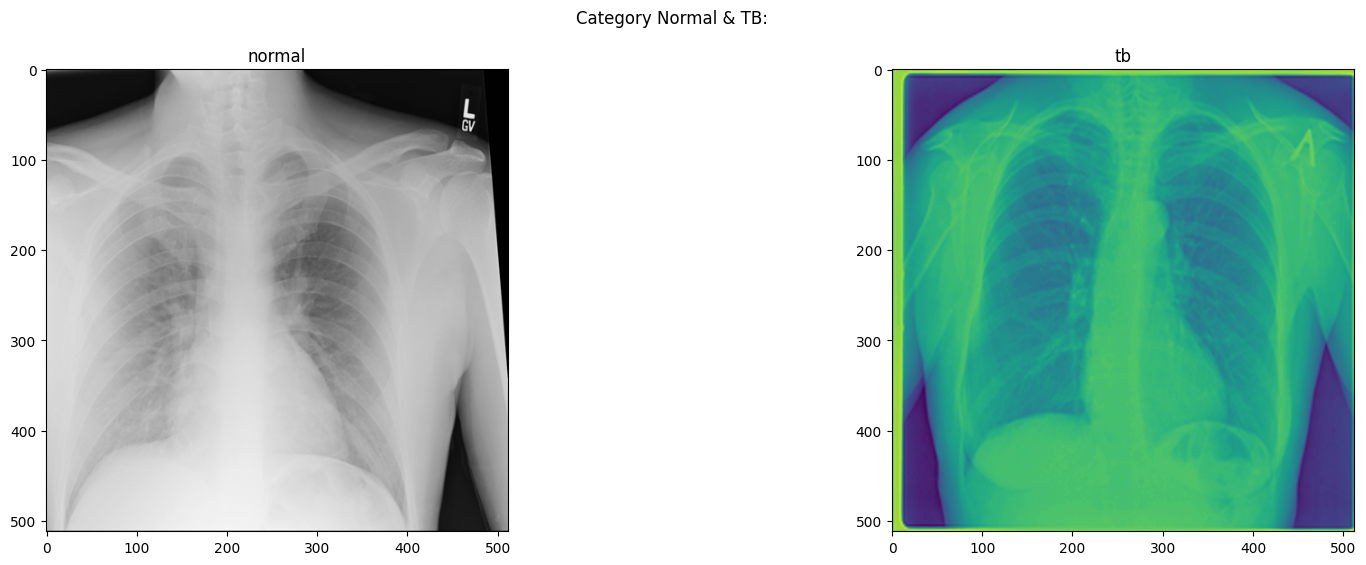

In [ ]:
import matplotlib.image as img
import PIL.Image as Image

fig, ax = plt.subplots(ncols= 2, nrows = 1, figsize=(20,6))
fig.suptitle('Category Normal & TB: ' )

rand_normal = np.random.randint(-1,len(normal))
print(rand_normal)

rand_tb = np.random.randint(-1, len(tb))
print(rand_tb)

normal_image = img.imread(normal[rand_normal])
tb_image = img.imread(tb[rand_tb])

ax[0].set_title('normal')
ax[1].set_title('tb')

ax[0].imshow(normal_image)
ax[1].imshow(tb_image)

### **Developing a deep learning model for tuberculosis (TB) detection using chest X-ray images involves several steps, including data preprocessing, model selection, training, and evaluation.
 For image classification tasks is the Convolutional Neural Network (CNN) called ResNet (Residual Network).
 Now, TB detection model using ResNet in Python using the Keras library.....

In [ ]:
#TensorFlow and Keras installed
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


Organize our dataset into separate folders for training and testing, with subfolders for each class (normal and tuberculosis).

In [ ]:
# Define constants
IMAGE_WIDTH, IMAGE_HEIGHT = 150, 150
BATCH_SIZE = 32

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Tuberculsis_chest_X-ray_ML 2023/Data_train',
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Assuming binary classification (tuberculosis vs. non-tuberculosis)
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Tuberculsis_chest_X-ray_ML 2023/Data_train',
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 1120 images belonging to 2 classes.
Found 280 images belonging to 2 classes.


In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),  #  rectified linear activation function
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,  # // operator in Python is used for floor division
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(validation_generator)
print("Test accuracy: {:.2f}%".format(test_accuracy * 100))


Epoch 1/10
35/35 [==============================] - 329s 9s/step - loss: 0.5771 - accuracy: 0.7411 - val_loss: 0.3990 - val_accuracy: 0.8477
Epoch 2/10
35/35 [==============================] - 47s 1s/step - loss: 0.2304 - accuracy: 0.9098 - val_loss: 0.4017 - val_accuracy: 0.8164
Epoch 3/10
35/35 [==============================] - 46s 1s/step - loss: 0.1612 - accuracy: 0.9348 - val_loss: 0.2566 - val_accuracy: 0.8906
Epoch 4/10
35/35 [==============================] - 46s 1s/step - loss: 0.1003 - accuracy: 0.9536 - val_loss: 0.3205 - val_accuracy: 0.9102
Epoch 5/10
35/35 [==============================] - 47s 1s/step - loss: 0.1612 - accuracy: 0.9393 - val_loss: 0.3559 - val_accuracy: 0.8750
Epoch 6/10
35/35 [==============================] - 45s 1s/step - loss: 0.1919 - accuracy: 0.9348 - val_loss: 0.1983 - val_accuracy: 0.9180
Epoch 7/10
35/35 [==============================] - 47s 1s/step - loss: 0.1099 - accuracy: 0.9607 - val_loss: 0.2343 - val_accuracy: 0.9180
Epoch 8/10
35/35 [=

In [ ]:
model.save('tb_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

# Evaluating The model:

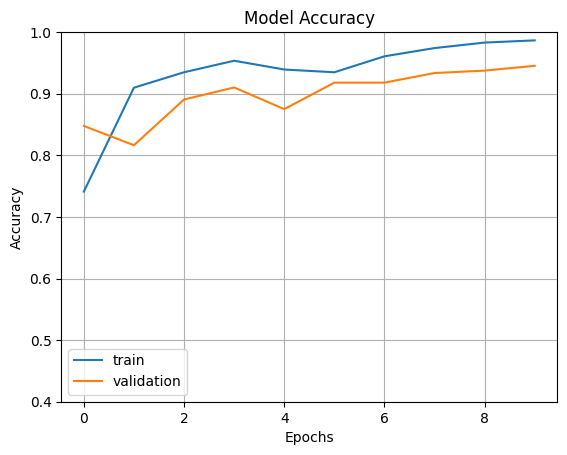

In [ ]:
fig1= plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

For Model loss:

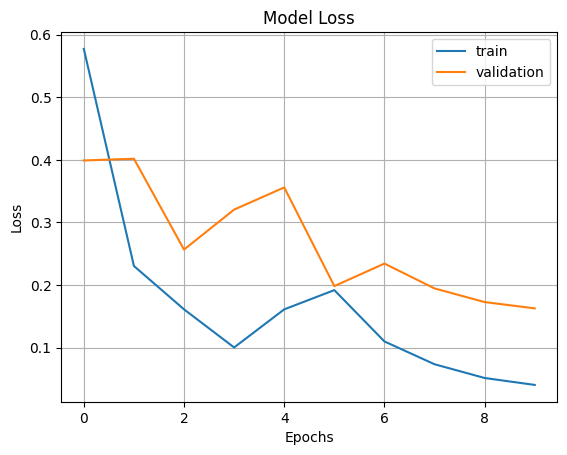

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions:

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

image_path = '/content/drive/MyDrive/Tuberculsis_chest_X-ray_ML 2023/Data_train/Normal/Normal-100.png'
img = image.load_img(image_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image pixel values to [0, 1]

# Make predictions
predictions = model.predict(img_array)


1/1 [==============================] - 0s 36ms/step


In [ ]:

# Print the predictions
if predictions[0][0] > 0.5:
    print("The image contains tuberculosis, Report: TB",predictions  )
else:
    print("The image does not contain tuberculosis, Report: Normal.",predictions)


The image does not contain tuberculosis, Report: Normal. [[0.00046784]]
